In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# commented out, city_url is defined below (Create an endpoint URL for a city.)



In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | dromolaxia
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | tonantins
Processing Record 7 of Set 1 | port hedland
Processing Record 8 of Set 1 | cabedelo
Processing Record 9 of Set 1 | tagusao
Processing Record 10 of Set 1 | dicabisagan
Processing Record 11 of Set 1 | horsham
Processing Record 12 of Set 1 | verdalsora
City not found. Skipping...
Processing Record 13 of Set 1 | palu
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | aripuana
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | harnosand
Processing Record 24 of Set 1 | diks

In [10]:
len(city_data)

579

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dromolaxia,34.8761,33.5860,73.27,85,0,0.00,CY,2021-09-29 21:25:20
1,Tiksi,71.6872,128.8694,30.58,83,100,4.16,RU,2021-09-29 21:25:20
2,Saint George,37.1041,-113.5841,77.47,30,1,4.00,US,2021-09-29 21:25:21
3,Jamestown,42.0970,-79.2353,67.32,52,1,4.00,US,2021-09-29 21:23:59
4,Albany,42.6001,-73.9662,61.30,67,94,5.97,US,2021-09-29 21:22:16
5,Tonantins,-2.8731,-67.8022,78.93,92,97,0.69,BR,2021-09-29 21:21:13
6,Port Hedland,-20.3167,118.5667,60.85,100,13,0.00,AU,2021-09-29 21:25:22
7,Cabedelo,-6.9811,-34.8339,79.47,82,38,14.20,BR,2021-09-29 21:25:22
8,Tagusao,9.1924,117.8141,79.86,84,96,3.36,PH,2021-09-29 21:25:23
9,Dicabisagan,17.0818,122.4157,78.21,87,91,4.03,PH,2021-09-29 21:25:23


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dromolaxia,CY,2021-09-29 21:25:20,34.8761,33.5860,73.27,85,0,0.00
1,Tiksi,RU,2021-09-29 21:25:20,71.6872,128.8694,30.58,83,100,4.16
2,Saint George,US,2021-09-29 21:25:21,37.1041,-113.5841,77.47,30,1,4.00
3,Jamestown,US,2021-09-29 21:23:59,42.0970,-79.2353,67.32,52,1,4.00
4,Albany,US,2021-09-29 21:22:16,42.6001,-73.9662,61.30,67,94,5.97
...,...,...,...,...,...,...,...,...,...
574,Tabou,CI,2021-09-29 21:29:00,4.4230,-7.3528,76.44,90,100,6.11
575,Longview,US,2021-09-29 21:27:05,32.5007,-94.7405,85.98,74,75,1.01
576,Buchanan,LR,2021-09-29 21:29:01,5.8808,-10.0467,78.76,88,98,4.27
577,Brandon,US,2021-09-29 21:25:46,27.9378,-82.2859,88.14,60,75,3.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

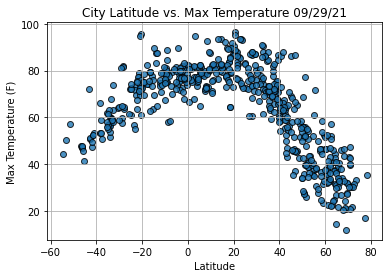

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

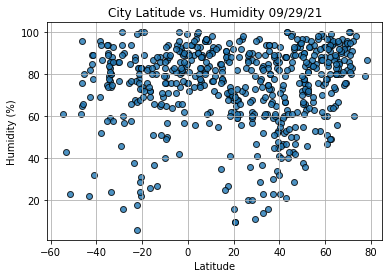

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

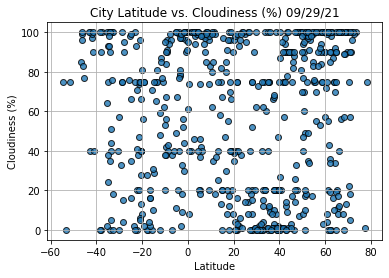

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

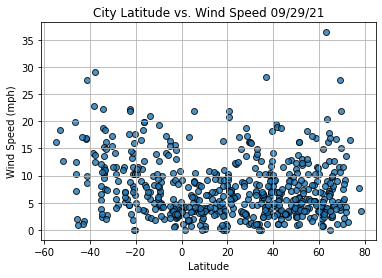

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()